In [126]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

# Read csv
df = pd.read_csv("../drybeans.csv")
# print(df)
# print("hoge ",df['Class'].unique())

# print('AspectRation mean')
# print("SEKER = ",df[df['Class'] == 'SEKER']['AspectRation'].mean())
# print("BARBUNYA = ",df[df['Class'] == 'BARBUNYA']['AspectRation'].mean())
# print("BOMBAY = ",df[df['Class'] == 'BOMBAY']['AspectRation'].mean())
# print("CALI = ",df[df['Class'] == 'CALI']['AspectRation'].mean())
# print("HOROZ = ",df[df['Class'] == 'HOROZ']['AspectRation'].mean())
# print("SIRA = ",df[df['Class'] == 'SIRA']['AspectRation'].mean())
# print("DERMASON = ",df[df['Class'] == 'DERMASON']['AspectRation'].mean())
#
# print('AspectRation std')
# print("SEKER = ",df[df['Class'] == 'SEKER']['AspectRation'].std())
# print("BARBUNYA = ",df[df['Class'] == 'BARBUNYA']['AspectRation'].std())
# print("BOMBAY = ",df[df['Class'] == 'BOMBAY']['AspectRation'].std())
# print("CALI = ",df[df['Class'] == 'CALI']['AspectRation'].std())
# print("HOROZ = ",df[df['Class'] == 'HOROZ']['AspectRation'].std())
# print("SIRA = ",df[df['Class'] == 'SIRA']['AspectRation'].std())
# print("DERMASON = ",df[df['Class'] == 'DERMASON']['AspectRation'].std())

# Check outliers

def remove_outliers(df, col):

    # Review descriptive statistics
    print(df[col].describe())

    # Show graph
    sns.distplot(df[col])

    # Specify the quantile
    # Find the value at 50% of the second quartile of the median
    q_50 = df[col].quantile(0.5)
    print("The value at 50% of the second quartile of the median = ",q_50)

    # Get 95% quantile values and remove outliers
    q_95 = df[col].quantile(0.95)
    print("The value at 95% of the second quartile of the median = ",q_95)

    # Extract data with values less than 95% order
    new_df = df.query(f'{col} < @q_95')

    # recheck
    # print(df[col].describe())
    # sns.distplot(df[col])

    return new_df[col]

# for col in df.columns:
#     if col == "Class":
#         break
#     df[col] = remove_outliers(df, col)

# df['Eccentricity'] = remove_outliers(df, 'Eccentricity')
# print(df['Perimeter'].describe())
# sns.distplot(df['Eccentricity'])

# Check missing values

# print("Count non-null values per row and column")
# print("df.isnull().all().sum() = " + str(df.isnull().all().sum()))
# print("Count non-nan values per row and column")
# print("df.isna().all().sum() = " + str(df.isna().all().sum()))
# print("Check the values whether contains at least one missing value per row and column and count the number of them")
# print("df.isnull().any().sum() = " + str(df.isnull().any().sum()))
# print("Count values which are not null and nan per row and column")
# print("df.count() = ")
# print(df.count())

# Check and delete duplicated rows

# print("Check rows with duplicates on all columns")
# print(df[df.duplicated()])
# print("df length = ", len(df))
# print("Deplicate value_counts = ")
# print(df.duplicated().value_counts())
# Remove rows with duplicates on all columns
# df = df.drop_duplicates()
# print("df length after removing = ", len(df))

# Handle outliers by 3σ method
# cols = df.columns
# for col in cols:
#     if col == "Class":
#         break
#     # logarithmic transformation
#     log = np.log1p(df[col])
#     mean = df[col].mean()
#     sigma = df[col].std()
#     limit_low = mean - 3 * sigma
#     limit_high = mean + 3 * sigma
#     print("col = ",col)
#     print("mean = ",mean)
#     print("sigma = ",sigma)
#     print("min = ",df[col].min())
#     print("max = ",df[col].max())
#     print("limit_low = ",limit_low)
#     print("limit_high = ",limit_high)
#     _df = df[(limit_low <= log) & (log <= limit_high)]

# print("_df = ",_df)

TypeError: '<' not supported between instances of 'str' and 'int'

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

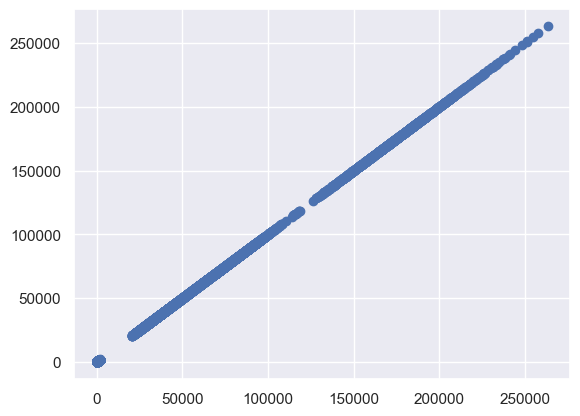

In [128]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
x = df.loc[:, 'Area':'ShapeFactor4']
df.loc[:, 'Class'] = LabelEncoder().fit_transform(df.loc[:, 'Class'])
y = df.loc[:, 'Class']
print(x)
print(y)

In [93]:
from sklearn.model_selection import train_test_split

# Standardization
x_std = StandardScaler().fit_transform(x)

# Normalization
# x_std = MinMaxScaler().fit_transform(x)

# 0.75 for train 0.25 for test and every time random
x_train, x_test, y_train, y_test = train_test_split(x_std, y, stratify=y)
print(x_train)
print(y_train)

[[-0.51888534 -0.70645963 -0.91171569 ...  1.5993726   1.80648053
   0.90497446]
 [-0.47918957 -0.63429299 -0.79916626 ...  1.22644877  1.41830089
   0.91499146]
 [-0.55073745 -0.55807561 -0.48912505 ... -0.00459134 -0.3705628
   0.54101749]
 ...
 [ 0.01557532  0.31053283  0.64387914 ... -1.18133001 -1.6159283
  -0.75403827]
 [-0.43744762 -0.50581732 -0.48504346 ...  0.24247413  0.16462385
   0.52318765]
 [-0.28152915 -0.23776846 -0.1566655  ... -0.27451911 -0.3773048
   0.40199023]]
744      5
978      5
12964    3
4734     2
2501     0
        ..
940      5
8134     6
6431     4
13451    3
8785     6
Name: Class, Length: 10208, dtype: int64


In [99]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty="none", class_weight=None).fit(x_train, y_train)
pred = model.predict(x_test)

print('pred = ', pred)
print('decision_function = ', model.decision_function(x_test))
print('predict_proba = ', model.predict_proba(x_test))

pred =  [6 3 6 ... 2 6 6]
decision_function =  [[  2.40682397 -11.98446569   2.27533679 ...   0.57104209   1.42524596
    6.24121669]
 [ -9.98658331 -20.69482325 -18.5092142  ...  17.47389015   0.24573258
    8.08498677]
 [ -1.54989311  -9.84810026  -1.07295032 ...  -0.53442825   2.7653015
    6.52071687]
 ...
 [  8.13228349  -0.03075683  12.33182698 ...   0.42174702   0.57206772
   -3.29425812]
 [ -1.65956145 -12.15649171  -2.7467009  ...   0.7741261    2.33133741
    7.27879037]
 [ -0.33340398 -14.54446318   2.2286836  ...   4.31064691  -1.1596066
    7.4970168 ]]
predict_proba =  [[2.05289542e-02 1.15427459e-08 1.79995923e-02 ... 3.27413726e-03
  7.69259575e-03 9.49778696e-01]
 [3.20104979e-15 7.15752568e-20 6.36738139e-19 ... 2.69913448e-03
  8.89468881e-11 2.25774866e-07]
 [2.87892202e-04 7.16744427e-08 4.63835003e-04 ... 7.94768571e-04
  2.15424506e-02 9.20982290e-01]
 ...
 [1.47804017e-02 4.21233468e-06 9.85200905e-01 ... 6.62281759e-06
  7.69708433e-06 1.61139595e-07]
 [9.78401

/Users/seigo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

print('classification accuracy = ', accuracy_score(y_test, pred))
# print('accuracy = ', accuracy_score(y_test, pred.round(), normalize=True))
print('balanced accuracy = ', balanced_accuracy_score(y_test, pred))
print('confusion matrix = \n', confusion_matrix(y_test, pred))
print('precision = ', precision_score(y_test, pred, average=None))
print('precision micro = ', precision_score(y_test, pred, average='micro'))
print('precision macro = ', precision_score(y_test, pred, average='macro'))
print('recall = ', recall_score(y_test, pred, average=None))
print('recall micro = ', recall_score(y_test, pred, average='micro'))
print('recall macro = ', recall_score(y_test, pred, average='macro'))
# print('f1 score = ', f1_score(y_test, pred, average=None))
# print('classification report = ', classification_report(y_test, pred))

c = confusion_matrix(y_test, pred)
accuracy = c.trace() / c.sum()  # 対角成分の和 / すべての成分の和
print('classification accuracy = ', accuracy)

classification accuracy =  0.9297678518953865
balanced accuracy =  0.9400345575543331
confusion matrix = 
 [[299   0  24   0   1   2   4]
 [  0 130   0   0   0   0   0]
 [ 12   0 388   0   4   0   4]
 [  0   0   0 807   0  16  64]
 [  2   0   8   3 460   0   9]
 [  1   0   1   8   0 484  13]
 [  2   0   4  43  10   4 596]]
precision =  [0.94620253 1.         0.91294118 0.93728223 0.96842105 0.95652174
 0.86376812]
precision micro =  0.9297678518953865
precision macro =  0.940733835112194
recall =  [0.90606061 1.         0.95098039 0.90980834 0.95435685 0.95463511
 0.90440061]
recall micro =  0.9297678518953865
recall macro =  0.9400345575543331
classification accuracy =  0.9297678518953865
